Завдання, що пропонуються, необхідно оформити у вигляді одного jupyter ноутбука.

Завдання 1
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.


Завдання 2
Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

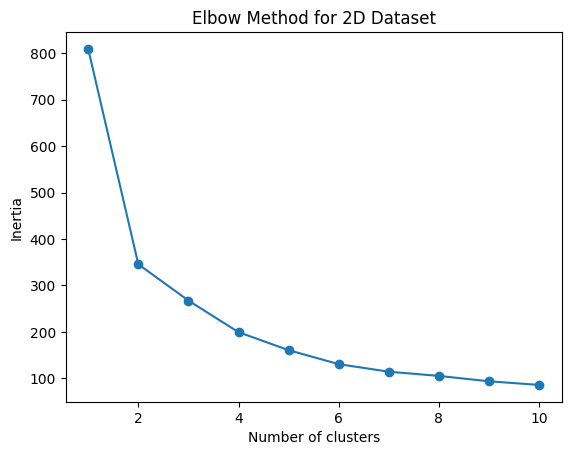

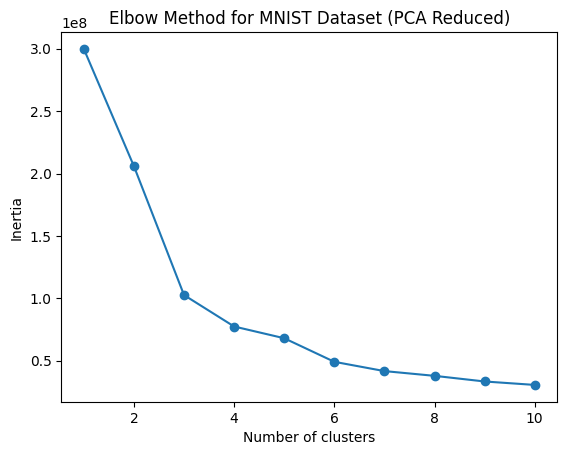

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Load the datasets

# data_2d_path = '/data/data_2d.csv'
# mnist_path = '/data/mnist.csv'
data_2d_path = '/content/data/data_2d.csv'
mnist_path = '/content/data/mnist.csv'

data_2d = pd.read_csv(data_2d_path)
mnist = pd.read_csv(mnist_path)

data_2d_head = data_2d.head()
mnist_head = mnist.head()

data_2d_head, mnist_head


X_2d = data_2d.iloc[:, 1:].values

def plot_elbow(X, title):
    inertia = []
    cluster_range = range(1, 11)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure()
    plt.plot(cluster_range, inertia, marker='o')
    plt.title(f'Elbow Method for {title}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

plot_elbow(X_2d, '2D Dataset')

X_mnist = mnist.iloc[:, 1:].values

pca = PCA(n_components=2)
X_mnist_2d = pca.fit_transform(X_mnist)

plot_elbow(X_mnist_2d, 'MNIST Dataset (PCA Reduced)')


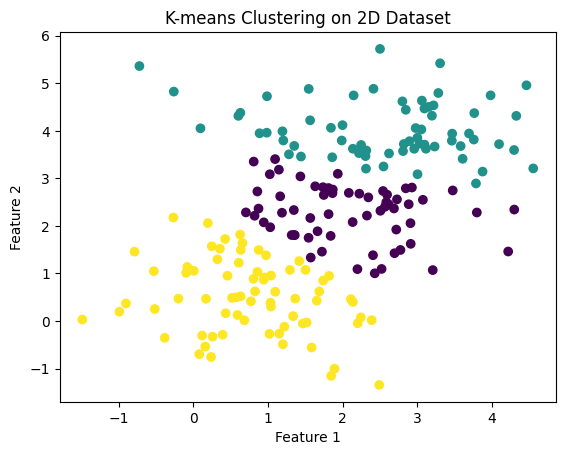

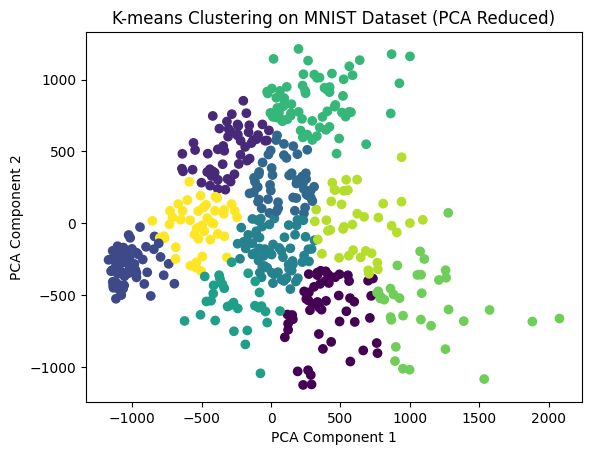

In [7]:

kmeans_2d = KMeans(n_clusters=3, random_state=42)
clusters_2d = kmeans_2d.fit_predict(X_2d)

kmeans_mnist = KMeans(n_clusters=10, random_state=42)
clusters_mnist = kmeans_mnist.fit_predict(X_mnist_2d)

plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters_2d, cmap='viridis')
plt.title('K-means Clustering on 2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.figure()
plt.scatter(X_mnist_2d[:, 0], X_mnist_2d[:, 1], c=clusters_mnist, cmap='viridis')
plt.title('K-means Clustering on MNIST Dataset (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
